<a href="https://colab.research.google.com/github/NiveskZ/ETL-Alura/blob/main/DataViz/Desafios_DataViz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Desafio: comparando tendências de imigração
criar um gráfico de linhas comparando os números de imigrantes do Brasil e Argentina para o Canadá, que são os maiores países da América do Sul.

Após criar o gráfico analise o resultado obtido e reflita nas seguintes questões:

1. Há alguma tendência ou padrão comum nos dados dos dois países?
2. Quais são os períodos com maior número de imigrantes nos dois países?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/alura-cursos/bibliotecas_visualizacao/refs/heads/main/Dados/imigrantes_canada.csv'
dados = pd.read_csv(url)
dados.head()

,País,Continente,Região,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afeganistão,Ásia,Sul da Ásia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albânia,Europa,Sul da Europa,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Argélia,África,Norte da África,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,Samoa Americana,Oceânia,Polinésia,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europa,Sul da Europa,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [2]:
dados.set_index('País', inplace=True)

In [3]:
anos = list(map(str,range(1980,2014)))
brasil_argentina = dados.loc[['Brasil','Argentina'],anos]
brasil_argentina = brasil_argentina.T
brasil_argentina.head()

País,Brasil,Argentina
1980,211,368
1981,220,426
1982,192,626
1983,139,241
1984,145,237


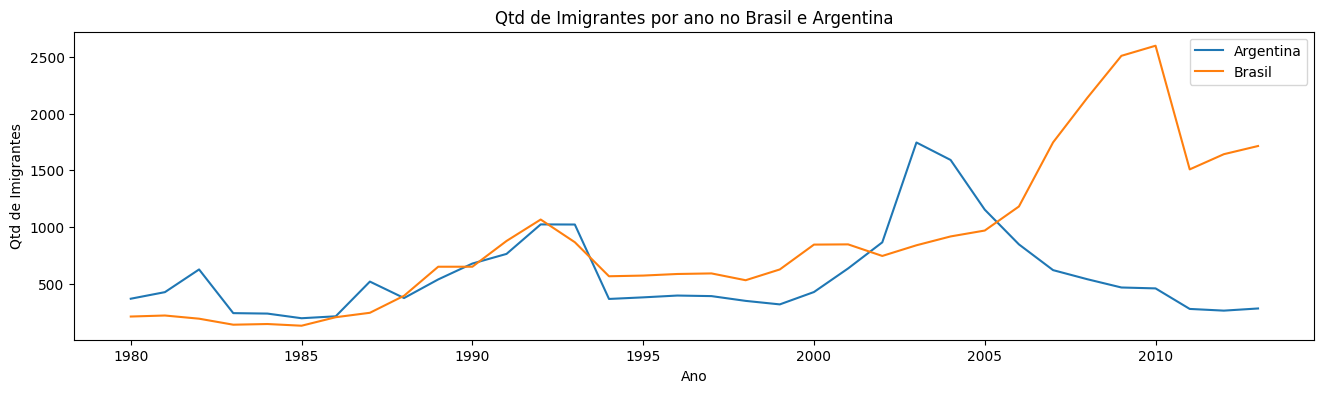

In [4]:
plt.figure(figsize=(16,4))
plt.plot(brasil_argentina['Argentina'],  label='Argentina')
plt.plot(brasil_argentina['Brasil'],label='Brasil')
plt.xticks(brasil_argentina.index[::5])
plt.title("Qtd de Imigrantes por ano no Brasil e Argentina")
plt.xlabel('Ano')
plt.ylabel('Qtd de Imigrantes')
plt.legend()
plt.show()

Pelo gráfico, podemos notar que até os anos 2000, tanto na Argentina quanto no Brasil a quantidade de imigrantes eram bem similar, apesar de podermos notar uma maior tendência de imigração argentina no início da década de 80.

Após os anos 2000 vemos uma crescente de Imigração Argentina, onde podemos encontrar o período de maior número de imigrantes entre os anos 2000 e 2005 que vem seguida de uma queda drástica e normalizando para os padrões de antes de 2000.

Por outro lado, no Brasil observamos um leve aumento a partir dos anos 2000 e um aumento exponencial entre os anos 2005 e 2010, onde se encontra seu período de maior número de imigrantes, indo contra a tendência argentina, além de manter a alta de imigrantes após esse período, apesar de ter uma queda no número de imigrantes.

## Desafio: visualizando dados de vendas de diferentes lojas

Você trabalha como Analista de Dados em uma empresa de varejo e recebeu a tarefa de criar uma figura com subplots que apresente a variação no número de vendas em quatro diferentes lojas ao longo de um ano. A gerência da empresa precisa visualizar de forma clara as tendências de vendas em cada loja, para que possam tomar decisões estratégicas sobre os estoques e ações de marketing. Para isso, você deve criar quatro subplots dispostos em duas linhas e duas colunas, onde cada subplot representa uma loja diferente. Nesse desafio, cada subplot deve apresentar um gráfico de linhas que mostre a variação do número de vendas ao longo dos meses do ano.


In [5]:
lojas = ['A', 'B', 'C', 'D']

vendas_2022 = {'Jan': [100, 80, 150, 50],
    'Fev': [120, 90, 170, 60],
    'Mar': [150, 100, 200, 80],
    'Abr': [180, 110, 230, 90],
    'Mai': [220, 190, 350, 200],
    'Jun': [230, 150, 280, 120],
    'Jul': [250, 170, 300, 140],
    'Ago': [260, 180, 310, 150],
    'Set': [240, 160, 290, 130],
    'Out': [220, 140, 270, 110],
    'Nov': [400, 220, 350, 190],
    'Dez': [300, 350, 400, 250]
}

In [6]:
import pandas as pd
df = pd.DataFrame(vendas_2022,lojas)
df.head()

,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
A,100,120,150,180,220,230,250,260,240,220,400,300
B,80,90,100,110,190,150,170,180,160,140,220,350
C,150,170,200,230,350,280,300,310,290,270,350,400
D,50,60,80,90,200,120,140,150,130,110,190,250


In [7]:
meses = df.columns.tolist()

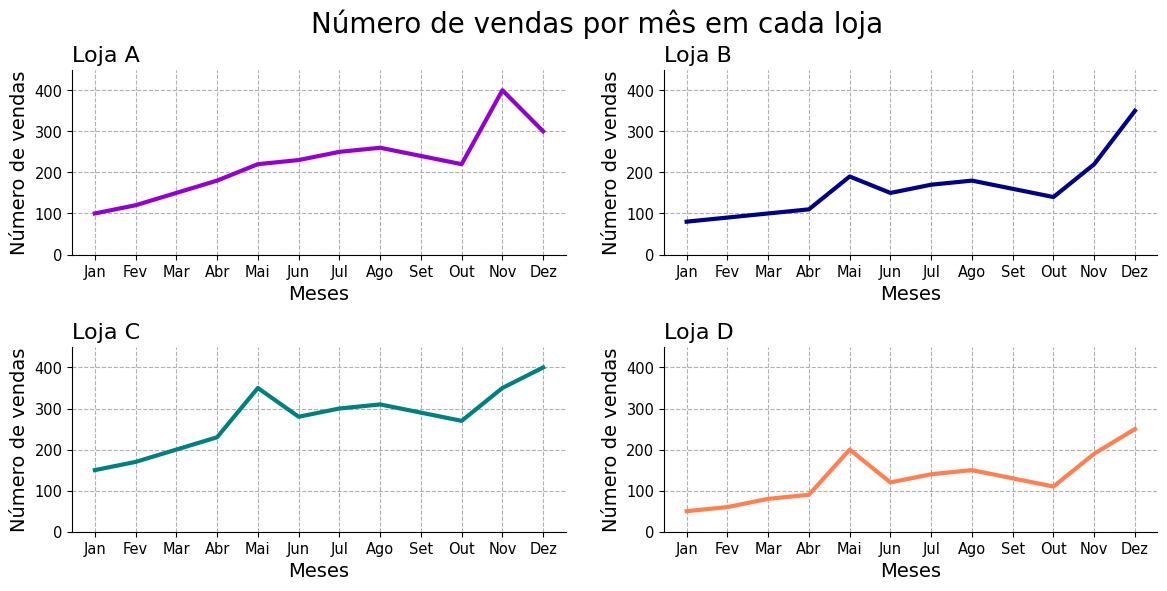

In [38]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,2,figsize=(14,6))
fig.subplots_adjust(hspace=0.5,wspace=0.2)
fig.suptitle('Número de vendas por mês em cada loja', fontsize=20)

cores = ['darkviolet','darkblue','teal','coral']

for i, ax in enumerate(axs.flat):
  ax.plot(df.loc[df.index[i]], lw=3, color=cores[i])
  ax.set_title(f'Loja {df.index[i]}', loc='left',fontsize= 16)
  ax.set_xlabel('Meses',fontsize=14)
  ax.set_ylabel('Número de vendas',fontsize=14)
  ax.xaxis.set_tick_params(labelsize=10.5)
  ax.yaxis.set_tick_params(labelsize=10.5)
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.grid(linestyle='--')

ymin = 0
ymax = 450

for ax in axs.ravel():
  ax.set_ylim(ymin,ymax)

plt.show()

# Desafio: criando um gráfico de linhas com a biblioteca Seaborn
Nesta etapa, seu desafio é criar uma figura contendo as tendências de imigração dos 4 maiores países da América latina: Brasil, Argentina, Peru e Colômbia. Através dessa criação você pode explorar diversas possibilidades e reconhecer de forma atrativa o seu processo de desenvolvimento.E não nos esqueçamos das orientações! Essa figura precisa ter uma linha para cada país, título, rótulos nos eixos, cores apropriadas, um tema da biblioteca Seaborn e legenda. Por isso, pense nas questões de acessibilidade, como tamanho das fontes e espessura das linhas. É importante escolher cores adequadas que não causem cansaço visual ou dificultem a leitura das informações. Além disso, o tamanho das fontes deve ser legível o suficiente para que as pessoas possam interpretar os dados com facilidade.

In [41]:
import seaborn as sns

dados.head()

,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Afeganistão,Ásia,Sul da Ásia,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albânia,Europa,Sul da Europa,1,0,0,0,0,0,1,2,...,1223,856,702,560,716,561,539,620,603,15699
Argélia,África,Norte da África,80,67,71,69,63,44,69,132,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
Samoa Americana,Oceânia,Polinésia,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europa,Sul da Europa,0,0,0,0,0,0,2,0,...,0,1,1,0,0,0,0,1,1,15


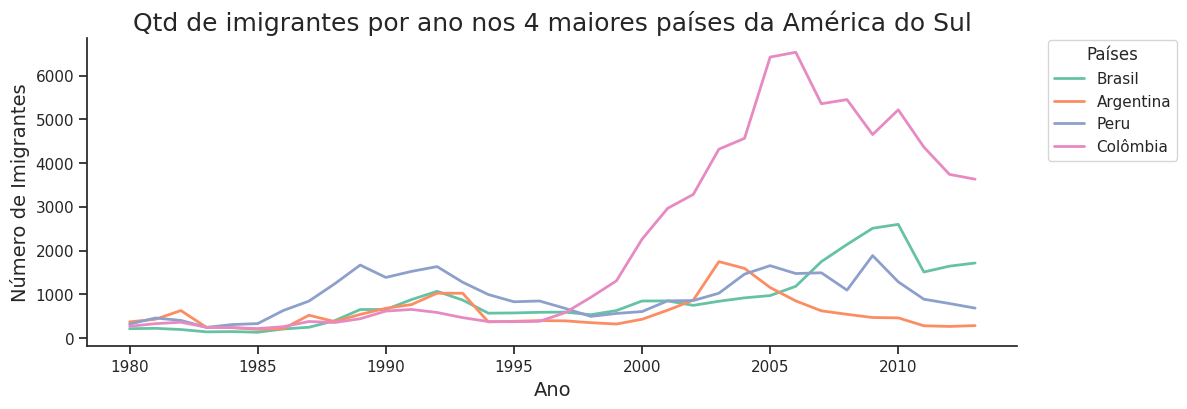

In [74]:
sns.set_theme(style='ticks')
sns.set_palette('Set2')

fig, ax = plt.subplots(figsize=(12,4))

ax = sns.lineplot(dados.loc['Brasil',anos], label='Brasil',lw=2)
ax = sns.lineplot(dados.loc['Argentina',anos], label='Argentina',lw=2)
ax = sns.lineplot(dados.loc['Peru',anos], label='Peru',lw=2)
ax = sns.lineplot(dados.loc['Colômbia',anos], label='Colômbia',lw=2)

ax.set_title("Qtd de imigrantes por ano nos 4 maiores países da América do Sul", fontsize=18)
ax.set_xlabel("Ano",fontsize=14)
ax.set_ylabel('Número de Imigrantes',fontsize=14)

ax.xaxis.set_major_locator(plt.MultipleLocator(5))

ax.legend(title='Países', loc='upper right', bbox_to_anchor=(1.18,1.02))

sns.despine()

plt.show()